# Gradient Boosting 

### Breast Cancer Data

In [1]:
# Gradient Boosting Algorithm
# Breast Cancer Data

# Python - Session 

# Classification Problem

# Importing the libraries

import os
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

from sklearn.ensemble import GradientBoostingClassifier # For Classification problem

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

In [2]:
# Importing the data

os.chdir('D:/MLP_Session_26_JULY/DATASET')

data = pd.read_csv('RF_data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Removing the id column
data.drop(data.columns[[0]],axis=1,inplace=True)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Converted the text labels for diagnosis column into 1 and 0

data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

In [7]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [8]:
data.diagnosis.unique()

array([1, 0], dtype=int64)

In [9]:
# Creating separate dataset for Independent and Dependent variables

X = data.iloc[:,data.columns != 'diagnosis'] # Independent variables
Y = data.iloc[:,data.columns == 'diagnosis'] # Dependent variable

In [10]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [12]:
# Splitting the dataset into Train and Test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [13]:
X_train.shape

(455, 30)

In [14]:
X_test.shape

(114, 30)

In [15]:
Y_train.shape

(455, 1)

In [16]:
Y_test.shape

(114, 1)

In [17]:
# Cleaning test sets to avoid future warning messages

Y_train = Y_train.values.ravel() 
Y_test = Y_test.values.ravel() 

In [18]:
# Creating the GradientBoostingClassifier object with default settings

gb_classifier = GradientBoostingClassifier(random_state=0)

In [19]:
gb_classifier.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [20]:
# Fitting the model on the training data

model = gb_classifier.fit(X_train,Y_train)

In [21]:
model.score(X_train, Y_train) # 100% accuracy

1.0

In [22]:
Y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred, Y_test)     # 96.49% accuracy 

0.9649122807017544

In [24]:
# So we get 100% accuracy in Training data and 96% accuracy in Testing data

In [25]:
# Boosting tries to minimize the error as much as possible

# Calculating the feature importance

feature_imp = model.feature_importances_

feature_imp

array([4.87846399e-04, 1.04137028e-02, 5.73809596e-04, 1.10392404e-03,
       1.12921852e-02, 1.75748156e-03, 1.03170909e-03, 2.79618667e-01,
       8.40024982e-03, 5.00213843e-06, 4.88013527e-03, 3.54958895e-03,
       3.04455047e-03, 2.18955813e-02, 1.17286964e-03, 1.56359778e-03,
       4.80502830e-03, 3.13141362e-05, 1.13550148e-03, 3.65785940e-03,
       1.52230366e-02, 3.20256903e-02, 6.66173492e-02, 9.35387683e-02,
       1.08318591e-03, 3.51842711e-03, 1.52470073e-02, 4.10655208e-01,
       1.24873914e-04, 1.54584892e-03])

In [26]:
# Arranging the feature importance relative to the max importance

feature_imp = 100.0 * (feature_imp/feature_imp.max())

feature_imp

array([1.18797081e-01, 2.53587502e+00, 1.39730261e-01, 2.68820172e-01,
       2.74979716e+00, 4.27970114e-01, 2.51234873e-01, 6.80908611e+01,
       2.04557246e+00, 1.21808718e-03, 1.18837779e+00, 8.64372077e-01,
       7.41388497e-01, 5.33186501e+00, 2.85609343e-01, 3.80756837e-01,
       1.17008824e+00, 7.62540828e-03, 2.76509700e-01, 8.90737369e-01,
       3.70701171e+00, 7.79868116e+00, 1.62222097e+01, 2.27779331e+01,
       2.63770164e-01, 8.56783754e-01, 3.71284887e+00, 1.00000000e+02,
       3.04084575e-02, 3.76434752e-01])

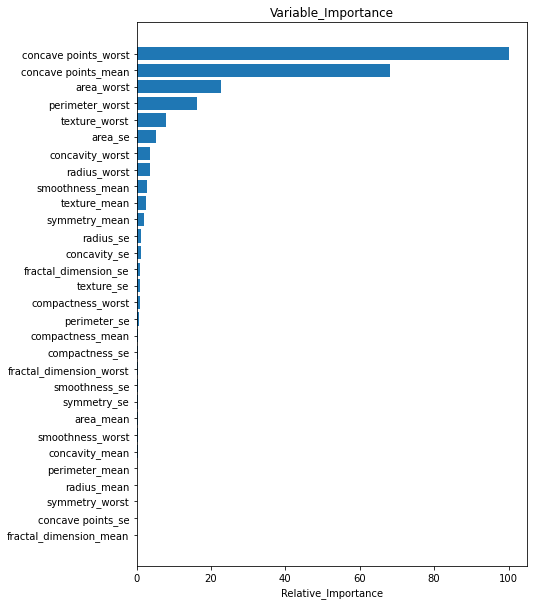

In [29]:
# Plotting the feature importance

import matplotlib.pyplot as plt


sorted_indices = np.argsort(feature_imp)
pos = np.arange(sorted_indices.shape[0]) + 0.5
plt.barh(pos, feature_imp[sorted_indices], align='center')
plt.yticks(pos,X.columns[sorted_indices])
plt.xlabel('Relative_Importance')
plt.title('Variable_Importance')
plt.rcParams['figure.figsize'] = [7,12]
plt.show()

In [30]:
# Creating the GradientBoostingClassifier object with default settings

gb_classifier = GradientBoostingClassifier(random_state=0)

In [31]:
gb_classifier.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [32]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

hyper_params = {'learning_rate':[0.2,0.15,0.1,0.05],
               'n_estimators':[100,150,200,250],
               'max_depth':[3,4,5,6]}

cv_tuning = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid = hyper_params, cv=10)

In [34]:
# Fitting the training data using the hyperparameters

cv_tuning.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.15, 0.1, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250]})

In [44]:
cv_tuning.best_params_, cv_tuning.best_score_

({'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 200},
 0.9714492753623188)

In [35]:
# Fitting the new model using the optimal hyperparameters

best_model = GradientBoostingClassifier(learning_rate= 0.15, max_depth= 3, n_estimators= 200, random_state=0)

best_model.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.15, n_estimators=200, random_state=0)

In [36]:
# Accuracy for the training data using optimal hyperparameters

best_model.score(X_train, Y_train)

1.0

In [37]:
# Calculating the predicted value of Y using optimal hyperparameters

Y_pred_new = best_model.predict(X_test)

In [38]:
# Accuracy for the test data using optimal hyperparameters

accuracy_score(Y_test, Y_pred_new)

0.9736842105263158

In [39]:
# So after using GridSearchCV, we find an increase in accuracy from 0.9649 to 0.9736